### The feature extraction performed by the base consists of three basic operations:

- Filter an image for a particular feature (convolution)
- Detect that feature within the filtered image (ReLU)
- Condense the image to enhance the features (maximum pooling)

- Example:
<img src="https://i.imgur.com/IYO9lqp.png"/>

### Convolution Layers

A convolutional layer carries out the filtering step. You might define a convolutional layer in a Keras model something like this:

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is None
    # More layers follow
])

### Weights

The weights a convnet learns during training are primarily contained in its convolutional layers. These weights we call kernels. We can represent them as small arrays:
<img src="https://i.imgur.com/uJfD9r9.png"/>

A kernel operates by scanning over an image and producing a weighted sum of pixel values. In this way, a kernel will act sort of like a polarized lens, emphasizing or deemphasizing certain patterns of information.

<img width="50%" src="https://i.imgur.com/j3lk26U.png"/>

Kernels define how a convolutional layer is connected to the layer that follows. The kernel above will connect each neuron in the output to nine neurons in the input. By setting the dimensions of the kernels with kernel_size, you are telling the convnet how to form these connections. Most often, a kernel will have odd-numbered dimensions -- like kernel_size=(3, 3) or (5, 5) -- so that a single pixel sits at the center, but this is not a requirement.

The kernels in a convolutional layer determine what kinds of features it creates. During training, a convnet tries to learn what features it needs to solve the classification problem. This means finding the best values for its kernels.

### Activations

The activations in the network we call feature maps. They are what result when we apply a filter to an image; they contain the visual features the kernel extracts. Here are a few kernels pictured with feature maps they produced.
<img src="https://i.imgur.com/JxBwchH.png"/>

From the pattern of numbers in the kernel, you can tell the kinds of feature maps it creates. Generally, what a convolution accentuates in its inputs will match the shape of the positive numbers in the kernel. The left and middle kernels above will both filter for horizontal shapes.

With the filters parameter, you tell the convolutional layer how many feature maps you want it to create as output.

### Detect with ReLU

After filtering, the feature maps pass through the activation function. The rectifier function has a graph like this:

<img src="https://i.imgur.com/DxGJuTH.png"/>

A neuron with a rectifier attached is called a rectified linear unit. For that reason, we might also call the rectifier function the ReLU activation or even the ReLU function.

The ReLU activation can be defined in its own Activation layer, but most often you'll just include it as the activation function of Conv2D.


In [2]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')
    # More layers follow
])

You could think about the activation function as scoring pixel values according to some measure of importance. The ReLU activation says that negative values are not important and so sets them to 0. ("Everything unimportant is equally unimportant.")

Here is ReLU applied the feature maps above. Notice how it succeeds at isolating the features.

<img src="https://i.imgur.com/dKtwzPY.png"/>

Like other activation functions, the ReLU function is nonlinear. Essentially this means that the total effect of all the layers in the network becomes different than what you would get by just adding the effects together -- which would be the same as what you could achieve with only a single layer. The nonlinearity ensures features will combine in interesting ways as they move deeper into the network. (We'll explore this "feature compounding" more in Lesson 5.)

## Example - Apply Convolution and ReLU

We'll do the extraction ourselves in this example to understand better what convolutional networks are doing "behind the scenes".

In [103]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [104]:
image_path = 'data/ccresult.png'

In [105]:
img = plt.imread(image_path)

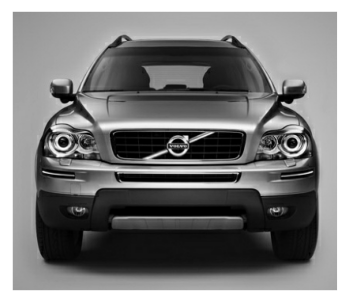

In [106]:
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [107]:
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

For the filtering step, we'll define a kernel and then apply it with the convolution. The kernel in this case is an "edge detection" kernel. You can define it with tf.constant just like you'd define an array in Numpy with np.array. This creates a tensor of the sort TensorFlow uses.

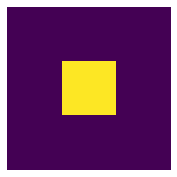

In [108]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
plt.imshow(kernel)
plt.axis('off');
plt.show();

In [109]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)

In [110]:
image.shape

TensorShape([366, 424, 4])

In [111]:
image = tf.expand_dims(image, axis=0)

In [112]:
image.shape

TensorShape([1, 366, 424, 4])

In [113]:
kernel.shape

TensorShape([3, 3])

In [115]:
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

In [116]:
kernel.shape

TensorShape([3, 3, 1, 1])

In [117]:
kernel = tf.cast(kernel, dtype=tf.float32)

In [ ]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

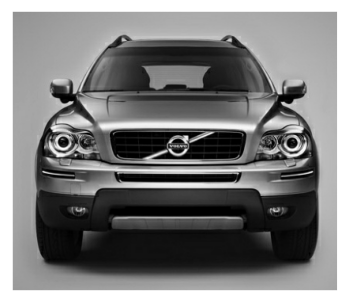

In [102]:
image_detect = tf.nn.relu(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

## Exercises